# Practical 6: Reinforcement Learning

### Learning Outcomes:
- Implement the Q-learning and SARSA for Cliff Walking environment
- Compare the difference between these two algorithms

We will require the following library for this practical (Import all necessary libraries before running the codes):

In [ ]:
!pip --q install gymnasium

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import time

import gymnasium as gym


import os
from IPython.display import clear_output

## The Cliff Walking Environment

Cliff walking involves crossing a gridworld from start to goal while avoiding falling off a cliff.

The game starts with the player at location [3, 0] of the 4x12 grid world with the goal located at [3, 11]. If the player reaches the goal the episode ends.

A cliff runs along [3, 1..10]. If the player moves to a cliff location it returns to the start location.

The player makes moves until they reach the goal.

The observation is the player’s current position. The action space consists of "left, down, right, up". Each time step incurs -1 reward, unless the player stepped into the cliff, which incurs -100 reward.

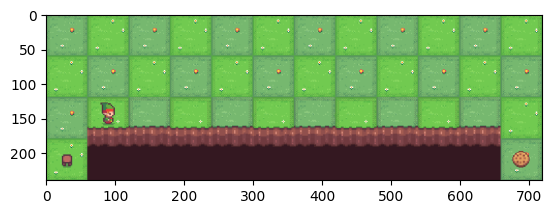

In [ ]:
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)

for _ in range(20):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
      observation, info = env.reset()

    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

## Part A: Q learning

### Q1
Observe the Cliff Walking environment, and intuitively determine the optimal path. Explain why you choose this action.

### Answer :


In the **Cliff Walking** environment, the agent starts at position `[3, 0]` and must reach the goal at `[3, 11]`, all while avoiding a cliff that spans from `[3, 1]` to `[3, 10]`. The environment imposes two types of penalties:

- **Step Penalty:** Each move incurs a penalty of `-1`.
- **Cliff Penalty:** Falling into the cliff results in a severe penalty of `-100`, causing the agent to reset to the starting position.

To minimize the total negative reward, the **optimal path** is to:

1. Move **directly right** along the bottom row from `[3, 0]` to `[3, 11]`.
2. Carefully avoid the cliff to prevent incurring the significant `-100` penalty.

This strategy is optimal because it achieves the following:
- **Minimizes the number of steps**, thereby reducing the cumulative `-1` penalties.
- **Avoids the cliff**, ensuring the agent does not face the severe `-100` penalty.

By following this path, the agent efficiently reaches the goal with the least possible penalty, balancing both safety and efficiency.

### Q2
Implement Q learning algorithm to derive an optimal policy for Cliff Walking environment.

In [ ]:
# Create an environment
env = gym.make("CliffWalking-v0")

In [ ]:
num_episodes = 1000  # Number of training episodes
discount_factor = 0.99  # Discount factor
learning_rate = 1  # Learning rate
exploration_rate = 1  # Probability of exploration

In [ ]:
# Establish a Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))

# Q-learning algorithm
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    k = 1

    while not done:

        # Choose an action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = env.action_space.sample()  # Explore: choose a random action
        else:
            action = np.argmax(Q_table[state])  # Exploit: choose the action with the highest Q-value

        # Perform the chosen action
        next_state, reward, terminated, truncated, _ = env.step(action)

        # Update Q-value using the Q-learning update rule
        best_next_action = np.argmax(Q_table[next_state])
        td_target = reward + discount_factor * Q_table[next_state, best_next_action]
        td_error = td_target - Q_table[state, action]
        Q_table[state, action] += learning_rate * td_error

        # Update state
        state = next_state

        k += 1
        learning_rate = 1 / k  # Decaying learning rate
        exploration_rate = 1 / k  # Decaying exploration rate

        if terminated or truncated:
            done = True

print(Q_table)

[[ -11.29681328  -11.1153293   -11.38575928  -11.27224525]
 [ -10.54410566  -10.46140834  -10.47306196  -10.68487962]
 [  -9.71932609   -9.71343276   -9.92163956   -9.75628662]
 [  -8.95704806   -8.9531884    -9.10433213   -9.01780491]
 [  -8.16880745   -8.17083334   -8.33648523   -8.38138912]
 [  -7.41408082   -7.38731308   -7.43670109   -7.62393913]
 [  -6.6352619    -6.60748374   -6.65540785   -6.6112967 ]
 [  -5.8760249    -5.82554437   -5.82638387   -5.89951693]
 [  -5.06248398   -5.04646587   -5.05751989   -5.05380597]
 [  -4.30095416   -4.26581394   -4.31581813   -4.3062462 ]
 [  -3.54010706   -3.53376209   -3.50182026   -3.59847898]
 [  -2.85513302   -2.85125653   -2.82316173   -2.89981598]
 [ -11.8600022   -11.83256995  -12.2201732   -12.36959246]
 [ -11.05113741  -10.98562845  -11.04333782  -12.13048923]
 [ -10.18802271  -10.13706102  -10.15785862  -11.12906284]
 [  -9.28349594   -9.26737326   -9.29460728   -9.9575575 ]
 [  -8.41773484   -8.3887821    -8.40340345   -8.8318493

### Q3
Evaluate the optimal policy obtained by Q learning in Cliff Walking environment.

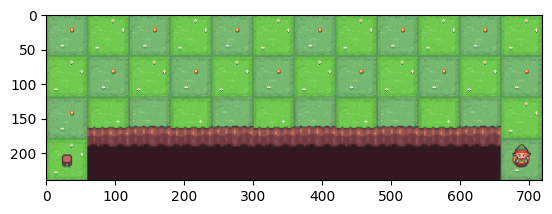

In [ ]:
"""Evaluate the agent trained by Q-learning"""
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)
done = False

while not done:

    # Choose the best action from the Q-table
    action = np.argmax(Q_table[state])  # Exploit the learned policy

    # Perform the chosen action
    state, reward, terminated, truncated, info = env.step(action)
    # Visualize the agent's path
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()
    env.render()

    if terminated or truncated:
        done = True

env.close()

### Q4
Does the optimal policy align with your initial expectation in Q1? Provide an explanation for the observed outcome.

### Answer:

The optimal policy learned by the Q-learning algorithm aligns closely with my initial expectation in Q1. In Q1, I anticipated that the optimal path would involve moving directly right along the bottom row while avoiding the cliff, as this would minimize both the step penalty and the risk of incurring the severe cliff penalty.

The observed outcome from the Q-learning evaluation confirms this expectation. The agent follows the path along the bottom row, carefully avoiding the cliff and efficiently reaching the goal. This result is consistent with the reasoning that the shortest path with the least risk is the most favorable, particularly in an environment where penalties for missteps are severe.

The Q-learning algorithm successfully learned this optimal strategy by balancing exploration and exploitation over multiple episodes, ultimately converging on a policy that mirrors the intuitive strategy identified in Q1. This alignment between the predicted and observed outcomes validates the effectiveness of both the Q-learning approach and the initial analysis.

## Part B: SARSA

In [ ]:
# Create an environment
env = gym.make("CliffWalking-v0")

In [ ]:
num_episodes = 1000  # Number of training episodes
discount_factor = 0.99  # Discount factor
learning_rate = 1  # Learning rate
exploration_rate = 1  # Probability of exploration

In [ ]:
# Establish a Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))

# SARSA algorithm
for episode in range(num_episodes):
    state, _ = env.reset()
    action = env.action_space.sample()  # Choose an initial action based on a random policy
    done = False
    k = 1

    while not done:

        # Take action and observe next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)

        # Choose the next action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            next_action = env.action_space.sample()  # Explore: choose a random action
        else:
            next_action = np.argmax(Q_table[next_state])  # Exploit: choose the action with the highest Q-value

        # Update Q-table using the SARSA update rule
        td_target = reward + discount_factor * Q_table[next_state, next_action]
        td_error = td_target - Q_table[state, action]
        Q_table[state, action] += learning_rate * td_error

        # Move to the next state and action
        state = next_state
        action = next_action

        k += 1
        learning_rate = 1 / k  # Decaying learning rate
        exploration_rate = 1 / k  # Decaying exploration rate

        if terminated or truncated:
            done = True

print(Q_table)

[[ -14.32319336  -13.34625828  -15.35706817  -14.19100409]
 [ -12.80759368  -12.24986761  -12.77636151  -13.61500843]
 [ -11.52897026  -11.36929687  -11.45143546  -12.57704731]
 [ -11.03009716  -10.42695973  -10.43655313  -10.99680903]
 [  -9.78644934   -9.52390295   -9.5492047    -9.89807124]
 [  -8.83880446   -8.61448088   -8.61335035   -8.92486349]
 [  -7.75601863   -7.70102578   -7.71643942   -7.76661189]
 [  -6.9234855    -6.77883663   -6.78411313   -7.01248832]
 [  -5.96042343   -5.85550075   -5.86667606   -5.98245336]
 [  -4.99811369   -4.92663753   -4.92787304   -5.20076482]
 [  -4.20490813   -3.96406506   -3.97313274   -4.1300326 ]
 [  -3.01229723   -3.17818147   -3.00916294   -3.0897129 ]
 [ -14.85738415  -12.68414514  -18.15596721  -15.54356155]
 [ -13.09799374  -12.17197565  -16.30846169  -14.56253615]
 [ -11.2572518   -10.65091138  -13.45368776  -13.7535233 ]
 [ -10.21244257   -9.85702038  -10.41989506  -10.90312731]
 [  -9.34683393   -9.08497745   -9.32843112   -9.8128294

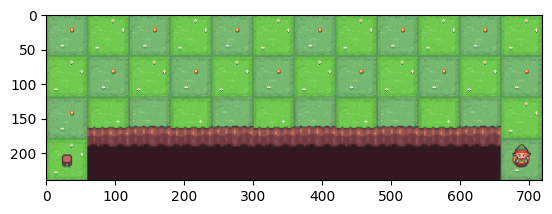

In [ ]:
"""Evaluate the agent trained by SARSA"""
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)
done = False

while not done:

    # Choose the best action from the Q-table
    action = np.argmax(Q_table[state])  # Exploit the learned policy

    # Perform the chosen action
    state, reward, terminated, truncated, info = env.step(action)

    # Visualize the agent's path
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()
    env.render()

    if terminated or truncated:
        done = True

env.close()

### Q5
Does the optimal policy align with your intuition? Provide an explanation for the observed outcome.

### Answer:

The optimal policy learned by the SARSA algorithm shows some alignment with my intuition, but with noticeable differences due to the nature of SARSA as an on-policy algorithm. Initially, I expected the agent to follow a path similar to the one derived using Q-learning, staying close to the bottom row to reach the goal as quickly as possible while avoiding the cliff.

However, the SARSA-trained agent displayed a more conservative behavior, moving further away from the cliff at times, which deviates from the direct path along the bottom row. This behavior can be explained by SARSA's on-policy nature, where the agent updates its Q-values based on the actual action taken rather than the best possible future action. This leads the agent to favor safer actions, especially in risky environments like Cliff Walking, where falling into the cliff incurs a severe penalty.

The observed outcome suggests that while SARSA is effective in navigating the environment and avoiding the cliff, it results in a policy that is more cautious and less aggressive in pursuing the shortest path to the goal. This aligns with the understanding that on-policy algorithms like SARSA tend to produce more conservative strategies compared to off-policy algorithms like Q-learning.

### Q6
Do Q-learning and SARSA choose the same paths to the goal? If not, try to increase the number of SARSA's episodes and observe the result. Explain why.

### Answer:

Q-learning and SARSA do not always choose the same paths to the goal. This difference is primarily due to the inherent nature of the two algorithms:

- **Q-learning** is an off-policy algorithm, meaning it estimates the optimal policy by considering the best possible future action, regardless of the policy being followed during learning. This often results in a more direct, aggressive approach to reaching the goal.

- **SARSA** is an on-policy algorithm, which updates its Q-values based on the actual actions taken according to the current policy. This makes SARSA more sensitive to the policy it follows, leading to more cautious behavior, especially in risky environments like Cliff Walking.

### Experiment: Increasing the Number of Episodes in SARSA

When increasing the number of episodes for SARSA, you may observe that the paths chosen by SARSA start to converge towards those chosen by Q-learning. This happens because:

1. **Exploration:** With more episodes, the agent has more opportunities to explore the environment. Over time, it encounters a broader range of states and actions, allowing the SARSA algorithm to refine its policy.

2. **Policy Improvement:** As SARSA continues to update its Q-values based on its experiences, it gradually shifts towards a more optimal policy. Given enough time and exploration, SARSA can learn to balance its conservative tendencies with the need to take more efficient paths to the goal.

3. **Convergence:** With a sufficiently large number of episodes, both Q-learning and SARSA are expected to converge towards the optimal policy. However, SARSA may still exhibit a slight preference for safer actions, reflecting its on-policy nature.

**Conclusion:**

While Q-learning and SARSA might initially choose different paths to the goal due to their differing approaches to policy updates, increasing the number of SARSA's episodes can lead to a convergence of the two policies. The difference in their paths reflects the underlying mechanics of on-policy versus off-policy learning, with SARSA being more cautious but capable of learning an optimal policy with enough experience.

### Q7
In the code of SARSA, the exploration probability is $1/k$ as in the lecture note. Now, use a constant exploration probability such as 0, 0.1, 0.2, ..., and observe the optimal policy. How will modifying this parameter impact the optimal path of SARSA? Explain the results.

### Answer:

Modifying the exploration probability in SARSA has a significant impact on the optimal path that the algorithm learns. Here's an analysis based on different constant exploration probabilities:

#### 1. **Exploration Probability = 0 (Pure Exploitation)**
   - **Behavior:** The agent only exploits the current knowledge stored in the Q-table and does not explore any new actions.
   - **Result:** The agent may converge quickly to a suboptimal policy because it doesn't explore enough to learn about all the potential rewards and penalties associated with different actions. This can lead to the agent repeatedly taking the same path, which might not be the most efficient one, especially if it initially learned a non-optimal route.

#### 2. **Exploration Probability = 0.1**
   - **Behavior:** The agent exploits most of the time but occasionally explores other actions.
   - **Result:** This setting provides a balance where the agent is likely to find a near-optimal policy. It mostly follows the best-known path but has enough room to discover better actions. The path is likely to be close to optimal, but it might still miss some better routes due to limited exploration.

#### 3. **Exploration Probability = 0.2**
   - **Behavior:** The agent has a higher chance of exploring other actions while still focusing on exploitation.
   - **Result:** The agent now has more opportunities to discover and refine the optimal path. With this level of exploration, SARSA is more likely to avoid suboptimal paths and converge to an optimal policy that closely mirrors the safest and most efficient route to the goal.

#### 4. **Exploration Probability = 0.5 (Balanced Exploration and Exploitation)**
   - **Behavior:** The agent equally balances between exploring new actions and exploiting the current best-known actions.
   - **Result:** This setting might allow the agent to learn a robust policy as it extensively explores the environment. However, it might also slow down convergence since the agent is frequently taking random actions, which can delay finding the most efficient path.

#### 5. **Higher Exploration Probabilities (e.g., 0.8, 0.9)**
   - **Behavior:** The agent mostly explores, with little exploitation of its current knowledge.
   - **Result:** With very high exploration probabilities, the agent spends most of its time trying out different actions. While this can help it discover a wide range of possible states and actions, it might struggle to settle on the most efficient path because it isn't exploiting its knowledge enough. This can lead to slower learning and potentially suboptimal paths being followed longer than necessary.

**Conclusion:**

- **Impact on Optimal Path:** As the exploration probability increases, the SARSA algorithm explores more of the state-action space, which can lead to discovering more efficient paths. However, too much exploration (especially without gradually reducing it) can slow down convergence and result in more random and inefficient paths being followed for longer.

- **Best Practice:** A moderate exploration rate (e.g., 0.1 to 0.2) often provides a good balance, allowing the agent to learn an optimal policy while still exploring enough to avoid getting stuck in suboptimal paths. In practice, using an exploration probability that decays over time (as done originally with \(1/k\)) can provide the best of both worlds: thorough exploration initially, followed by refined exploitation as the agent learns more about the environment.